Mount the google drive in colab where the csv file is located

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Import the required libraries for the project

In [ ]:
# import the required libraries
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt

**Data Cleaning**

Here we drop the unnecessary columns which aren't required for linear regression.

We are analysing only petrol and diesel cars in our project.


In [ ]:
# Read the csv file into Pandas dataframe
df = pd.read_csv('/content/drive/MyDrive/data.csv')

In [ ]:
df.head()

,Unnamed: 0,brand,model,color,registration_date,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km,offer_description
0,0,alfa-romeo,Alfa Romeo GTV,red,10/1995,1995,1300,148,201,Manual,Petrol,"10,9 l/100 km",260 g/km,160500.0,2.0 V6 TB
1,1,alfa-romeo,Alfa Romeo 164,black,02/1995,1995,24900,191,260,Manual,Petrol,NaN,- (g/km),190000.0,"Q4 Allrad, 3.2L GTA"
2,2,alfa-romeo,Alfa Romeo Spider,black,02/1995,1995,5900,110,150,Unknown,Petrol,NaN,- (g/km),129000.0,ALFA ROME 916
3,3,alfa-romeo,Alfa Romeo Spider,black,07/1995,1995,4900,110,150,Manual,Petrol,"9,5 l/100 km",225 g/km,189500.0,2.0 16V Twin Spark L
4,4,alfa-romeo,Alfa Romeo 164,red,11/1996,1996,17950,132,179,Manual,Petrol,"7,2 l/100 km",- (g/km),96127.0,"3.0i Super V6, absoluter Topzustand !"


Dropping unnecessary columns

In [ ]:
# Dropping unnecessary columns
dropped_columns = ['Unnamed: 0', 'model', 'color', 'registration_date', 'power_ps', 'fuel_consumption_g_km', 'offer_description']
for column_name in dropped_columns:
  df = df.drop(column_name, axis=1)

df.isnull().sum()

brand                           0
year                            0
price_in_euro                   0
power_kw                      134
transmission_type               0
fuel_type                       0
fuel_consumption_l_100km    26873
mileage_in_km                 152
dtype: int64

In [ ]:
df.head()


,brand,year,price_in_euro,power_kw,transmission_type,fuel_type,fuel_consumption_l_100km,mileage_in_km
0,alfa-romeo,1995,1300,148,Manual,Petrol,"10,9 l/100 km",160500.0
1,alfa-romeo,1995,24900,191,Manual,Petrol,NaN,190000.0
2,alfa-romeo,1995,5900,110,Unknown,Petrol,NaN,129000.0
3,alfa-romeo,1995,4900,110,Manual,Petrol,"9,5 l/100 km",189500.0
4,alfa-romeo,1996,17950,132,Manual,Petrol,"7,2 l/100 km",96127.0


In [ ]:
df.transmission_type.unique()

array(['Manual', 'Unknown', 'Automatic', 'Semi-automatic'], dtype=object)

In [ ]:
df.fuel_type.unique()

array(['Petrol', 'Diesel', 'Hybrid', 'LPG', 'Other', '07/2004',
       '74.194 km', '110.250 km', '06/2014', 'CNG', 'Diesel Hybrid',
       '12/2016', 'Automatic', 'Electric', '12/2019', 'Unknown',
       '06/2023', 'Ethanol', 'Manual', '300.000 km', '264.000 km',
       'KETTE NEUE', '108.313 km', '05/2009', '180.000 km', '04/2013',
       '03/2014', '08/2014', '01/2016', '03/2017', '04/2008', '07/2007',
       '145.500 km', '12/2012', '25890', '10/2022', '06/2004', '09/2009',
       '12/2014', '02/2017', '12890', '11/2018', '08/2018', '03/2019',
       '19450', '11/2021', '20.600 km', 'Hydrogen', '07/2022', '05/2015',
       '03/2018', '04/2022', '160.629 km', '144.919 km', '02/1996',
       '04/2000', '200.000 km', '06/2009', '185.500 km', '13000',
       '05/2012', '11/2014', '10/2015', '350.000 km', '49.817 km',
       '34900', '35.487 km', '03/2021', '26890', '26990', '4.000 km',
       '11/2005', '07/2005', '08/2011', '02/2011', '03/2011', '10/2013',
       '09/2015', '02/2018',

As we can see above, the fuel type has some garbage values when we inspect the unique values in the fuel_type column.

We use only Petrol and Diesel cars in the dataset.

In [ ]:
#Data Cleaning
# Take only petrol and diesel cars
df['fuel_type'] = df['fuel_type'].astype(str)
df = df[df['fuel_type'].str.contains('Petrol') | df['fuel_type'].str.contains('Diesel')]

In [ ]:
df.fuel_type.unique()

array(['Petrol', 'Diesel', 'Diesel Hybrid'], dtype=object)

Before removing null values, we see if we can do any mean or median imputation.

In [ ]:
df.isnull().sum()

brand                           0
year                            0
price_in_euro                   0
power_kw                       74
transmission_type               0
fuel_type                       0
fuel_consumption_l_100km    18628
mileage_in_km                  31
dtype: int64

<ipython-input-12-abf7239a6290>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['power_kw'])


<Axes: xlabel='power_kw', ylabel='Density'>

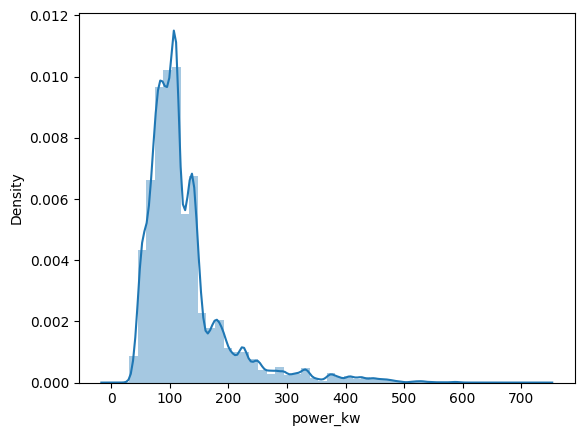

In [ ]:
sns.distplot(df['power_kw'])

For the power_kw column, we see that the distribution is skewed. Hence we perform median imputation on the power_kw column.

Thus we replace missing/null values with median of power_kw.

In [ ]:
# Fill missing power_kw with the median value
df_not_null = df.dropna(subset=['power_kw'])
df_not_null['power_kw']=df_not_null.power_kw.astype(int)
df['power_kw'] = df['power_kw'].astype(float)
df['power_kw'].fillna(df_not_null['power_kw'].median(), inplace=True)

<ipython-input-13-a0511294fd48>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_not_null['power_kw']=df_not_null.power_kw.astype(int)


Convert the fuel_consumption_l_100km column string values to float values.

In [ ]:
# convert string of fuel_consumption_l_km to float values

df['fuel_consumption_l_100km'] = df['fuel_consumption_l_100km'].astype(str)

# Filter out entries with units other than liters per 100 kilometers
df = df[df['fuel_consumption_l_100km'].str.contains('l/100 km')]

# Extract numeric values and convert to a consistent format
df['fuel_consumption_l_100km'] = df['fuel_consumption_l_100km'].str.extract(r'(\d+\.\d+|\d+)').astype(float)


Check distribution plot of fuel_consumption_l_100km for mean/median imputation

<ipython-input-15-e7d5026cbea5>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['fuel_consumption_l_100km'], ax=ax)


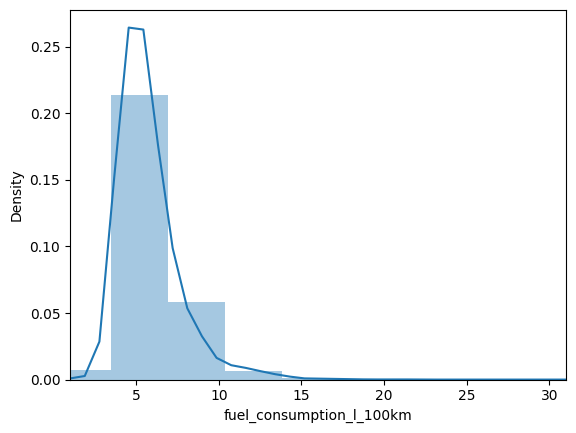

In [ ]:
fig, ax = plt.subplots()
sns.distplot(df['fuel_consumption_l_100km'], ax=ax)
ax.set_xlim(1,31)
plt.show()

Replace null values in fuel_consumption_l_100km column with the median value in that column

In [ ]:
df_not_null = df.dropna(subset=['fuel_consumption_l_100km'])
df['fuel_consumption_l_100km'].fillna(df_not_null['fuel_consumption_l_100km'].median(), inplace=True)

In [ ]:
df.isnull().sum()

brand                        0
year                         0
price_in_euro                0
power_kw                     0
transmission_type            0
fuel_type                    0
fuel_consumption_l_100km     0
mileage_in_km               31
dtype: int64

Follow the same process given above on the mileage_in_km column. First inspect the distribution and then decide on mean or median imputation.

<ipython-input-18-4f8f8fd98ad1>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['mileage_in_km'], ax=ax)  # distplot is deprecate and replaced by histplot


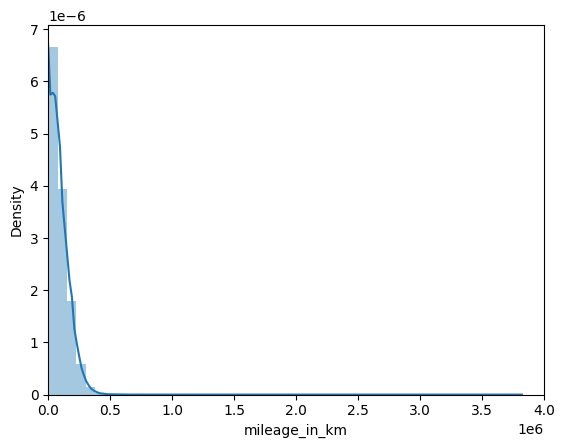

In [ ]:
fig, ax = plt.subplots()
sns.distplot(df['mileage_in_km'], ax=ax)  # distplot is deprecate and replaced by histplot
ax.set_xlim(0.0e6,4.0e6)
plt.show()

Replace null values in mileage_in_km column with the median value in that column

In [ ]:
df_not_null = df.dropna(subset=['mileage_in_km'])
df['mileage_in_km'].fillna(df_not_null['mileage_in_km'].median(), inplace=True)

In [ ]:
df['price_in_euro']=df['price_in_euro'].astype(float)

Change datatype of year column from string to integer.

In [ ]:
# transform year from string into integer
df['year'] = df['year'].astype(str)

# Filter out non-numeric values
numeric_years = df[df['year'].str.isnumeric()]

# Convert years to integer type
numeric_years['year'] = numeric_years['year'].astype(int)

# Filter out years outside the valid range
valid_years = numeric_years[(numeric_years['year'] >= 1995) & (numeric_years['year'] <= 2023)]

df['year'] = valid_years['year']


No null values now as shown below

In [ ]:
df.isnull().sum()

brand                       0
year                        0
price_in_euro               0
power_kw                    0
transmission_type           0
fuel_type                   0
fuel_consumption_l_100km    0
mileage_in_km               0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 211541 entries, 0 to 251076
Data columns (total 8 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   brand                     211541 non-null  object 
 1   year                      211541 non-null  int64  
 2   price_in_euro             211541 non-null  float64
 3   power_kw                  211541 non-null  float64
 4   transmission_type         211541 non-null  object 
 5   fuel_type                 211541 non-null  object 
 6   fuel_consumption_l_100km  211541 non-null  float64
 7   mileage_in_km             211541 non-null  float64
dtypes: float64(4), int64(1), object(3)
memory usage: 14.5+ MB


Heatmap to show corelation between variables

In [ ]:
# Add new columns with imperial units

df['power_hp'] = df['power_kw'] / 0.7457

df['mpg'] = 235.215 / df['fuel_consumption_l_100km']

df['mileage_in_miles'] = df['mileage_in_km'] / 1.609


In [ ]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Check for NaN values
inf_check = df.isna().any(axis=None)

if inf_check:
    print("DataFrame contains infinity or NaN values.")
else:
    print("DataFrame does not contain infinity or NaN values.")

DataFrame contains infinity or NaN values.


In [ ]:
df.isnull().sum()

brand                        0
year                         0
price_in_euro                0
power_kw                     0
transmission_type            0
fuel_type                    0
fuel_consumption_l_100km     0
mileage_in_km                0
power_hp                     0
mpg                         57
mileage_in_miles             0
dtype: int64

In [ ]:
df_not_null = df.dropna(subset = ['mpg'])
df.fillna(df_not_null['mpg'].median(), inplace=True)

<Axes: >

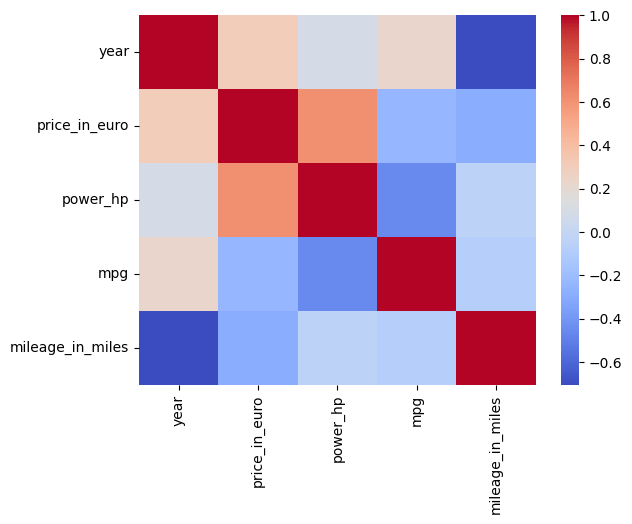

In [ ]:
df1 = df.iloc[:, 1:3].copy()
df2 = df.iloc[:,8:].copy()

df_heatmap = pd.concat([df1, df2],axis = 1)

sns.heatmap(df_heatmap.corr(), cmap="coolwarm")

In [ ]:
X=df[['year','power_hp', 'mpg','mileage_in_miles']]
y=df['price_in_euro']

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import r2_score
import statsmodels.api as sm
from scipy import stats

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

Linear Regression Model

In [ ]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [ ]:
# print the intercept
print(model.intercept_)

-1684580.5879554853


In [ ]:
X2 = sm.add_constant(X_train)
est = sm.OLS(y_train, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:          price_in_euro   R-squared:                       0.439
Model:                            OLS   Adj. R-squared:                  0.439
Method:                 Least Squares   F-statistic:                 3.308e+04
Date:                Mon, 08 Apr 2024   Prob (F-statistic):               0.00
Time:                        16:08:53   Log-Likelihood:            -1.9615e+06
No. Observations:              169232   AIC:                         3.923e+06
Df Residuals:                  169227   BIC:                         3.923e+06
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1.685e+06   3.52e+04  

In [ ]:
coeff_df = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
year,833.966220
power_hp,217.931428
mpg,-31.310912
mileage_in_miles,-0.119794


In [ ]:
predictions = model.predict(X_test)
mae = metrics.mean_absolute_error(y_test, predictions)
mse = metrics.mean_squared_error(y_test, predictions)
rmse = np.sqrt(metrics.mean_squared_error(y_test, predictions))
r_score = r2_score(y_test, predictions)

print('MAE:', mae)
print('MSE:', mse)
print('RMSE:', rmse)
print('R squared:',r_score )


MAE: 8983.742629947725
MSE: 454409051.86292857
RMSE: 21316.872469077836
R squared: 0.5419645324860002


Decision Tree Model

In [ ]:
dt_model = DecisionTreeRegressor()

# Train the regressor on the training data
dt_model.fit(X_train, y_train)

# Predict the housing prices for the test data
y_pred = dt_model.predict(X_test)

# Calculate the mean squared error of the regressor
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
# print("Mean Squared Error:", mse)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('MAE:', mae)
print('MSE:', mse)
print('RMSE:', rmse)

MAE: 5806.383444928376
MSE: 346714255.3569775
RMSE: 18620.264642506496


Random Forest Model

In [ ]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate model performance
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
# print("Mean Squared Error:", mse)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('MAE:', mae)
print('MSE:', mse)
print('RMSE:', rmse)

MAE: 4815.949864982732
MSE: 183692145.67021576
RMSE: 13553.307554623549


Ridge Model

In [ ]:
ridge_model = Ridge(alpha=1.0)  # You can adjust the regularization strength (alpha) as needed
ridge_model.fit(X_train, y_train)

# Make predictions
y_pred = ridge_model.predict(X_test)

# Evaluate model performance
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('MAE:', mae)
print('MSE:', mse)
print('RMSE:', rmse)


MAE: 8983.742568490643
MSE: 454409051.64318687
RMSE: 21316.87246392366


Gradient Boostin Machine (GBM) Model

In [ ]:
gbm_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)  # Adjust parameters as needed
gbm_model.fit(X_train, y_train)

# Make predictions
y_pred = gbm_model.predict(X_test)

# Evaluate model performance
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('MAE:', mae)
print('MSE:', mse)
print('RMSE:', rmse)

MAE: 5605.188144026183
MSE: 193324475.55616716
RMSE: 13904.117215996388


Neural Networks

In [ ]:
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam


In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create neural network model
nn_model = Sequential()
nn_model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))  # Input layer with 64 neurons and ReLU activation
nn_model.add(Dense(32, activation='relu'))  # Hidden layer with 32 neurons and ReLU activation
nn_model.add(Dense(1))  # Output layer with 1 neuron for regression
nn_model.compile(loss='mean_squared_error', optimizer=Adam(lr=0.001))  # Compile the model with mean squared error loss and Adam optimizer

# Train the model
nn_model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, verbose=1)

# Make predictions
y_pred = nn_model.predict(X_test_scaled)


# Evaluate model performance
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('MSE:', mse)
print('RMSE:', rmse)

Epoch 1/50
5289/5289 [==============================] - 11s 2ms/step - loss: 941924736.0000
Epoch 2/50
5289/5289 [==============================] - 12s 2ms/step - loss: 646879488.0000
Epoch 3/50
5289/5289 [==============================] - 10s 2ms/step - loss: 628926528.0000
Epoch 4/50
5289/5289 [==============================] - 10s 2ms/step - loss: 618400064.0000
Epoch 5/50
5289/5289 [==============================] - 10s 2ms/step - loss: 606392960.0000
Epoch 6/50
5289/5289 [==============================] - 9s 2ms/step - loss: 596704320.0000
Epoch 7/50
5289/5289 [==============================] - 10s 2ms/step - loss: 586729792.0000
Epoch 8/50
5289/5289 [==============================] - 10s 2ms/step - loss: 575608320.0000
Epoch 9/50
5289/5289 [==============================] - 8s 2ms/step - loss: 567590336.0000
Epoch 10/50
5289/5289 [==============================] - 10s 2ms/step - loss: 558302400.0000
Epoch 11/50
5289/5289 [==============================] - 10s 2ms/step - loss: 551